### Background
we are tasked as a team of data engineer for a chess competition to create a way for viewers at home to be able to watch the match. we decided to create a model where it can identify the chess piece in real time and turn it into a virtual chess board. we are tasked to build a model where the model could recognize the chess pieces. we decide to train the model using the [Data](https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset/data) we found on kaggle. with this data we start creating the computer vision model in order to recognize the chess pieces and build the first step of changing a real chess game into a virtual chess game

### Problem Statement
we want to create a computer vision in order to classify chess piece to help turn a real chess game into a virtual chess game. this model with use computer vision which is used to train computer to be able to recognize images based on certain characteristics. the model will utilize a sequential model and also vgg19 model for its improvement.

# Import Libraries

### installing split folder and squarify

we install the split folder and squarify as sometime they need to be reinstalled after every restart

In [2]:
! pip install split-folders

In [3]:
! pip install squarify

Before we start the data loading process, we have to import the libraries necessary for the modeling process. The following is the libraries used in the modeling process:

### importing library

In [4]:
# Importing required libraries

# Libraries for preparing the dataset
import os
import numpy as np
import pandas as pd
import splitfolders
import cv2
import glob

# Libraries for plotting the dataset
import matplotlib.pyplot as plt
import squarify
import seaborn as sns

# Library for creating the computer vision model
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.layers import InputLayer, Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation, GlobalAveragePooling2D

# Libraries for creating the confusion matrix and classification report
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

# ignore warning
import warnings
warnings.filterwarnings('ignore')

# Connect to Gdrive
from google.colab import drive


# Data Loading

The first step is to load the dataset in the form of png or images into a dataframe. we do this by connecting google collab with kaggle by using kaggle API and saving the files downloaded into google drive. and lastly we turned the data downloaded into a dataframe

In [5]:
# connecting collab into google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# make a new directory for kaggle
! mkdir ~/.kaggle

In [8]:
# copying the kaggle API into the kaggle directory
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/Kaggle/kaggle.json': No such file or directory


In [9]:
# changing the permission for kaggle.json to be able to read and write
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [10]:
# downloading the dataset of chess pieces from kaggle
! kaggle datasets download niteshfre/chessman-image-dataset

Dataset URL: https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset
License(s): other
 85% 49.0M/57.6M [00:00<00:00, 54.3MB/s]
100% 57.6M/57.6M [00:00<00:00, 60.6MB/s]


In [11]:
# unzip the downloaded files
! unzip chessman-image-dataset.zip

Archive:  chessman-image-dataset.zip
  inflating: Chessman-image-dataset/Chess/Bishop/00000000.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000001.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000002.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000003.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000004.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000006.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000007.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000008.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000009.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000010.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000011.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000012.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000013.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000015.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000016.jpg  
  i

all the code above is used in order to be able to download the data from kaggle into drive so that it can be called easily

In [12]:
# retrieve all .jpg file from the kaggle dataset
bishop_files = glob.glob("Chessman-image-dataset/Chess/Bishop/*.jpg")
king_files = glob.glob("Chessman-image-dataset/Chess/King/*.jpg")
knight_files = glob.glob("Chessman-image-dataset/Chess/Knight/*.jpg")
pawn_files = glob.glob("Chessman-image-dataset/Chess/Pawn/*.jpg")
queen_files = glob.glob("Chessman-image-dataset/Chess/Queen/*.jpg")
rook_files = glob.glob("Chessman-image-dataset/Chess/Rook/*.jpg")

# sorting the files from lowest to highest alphabetically
bishop_files.sort()
king_files.sort()
knight_files.sort()
pawn_files.sort()
queen_files.sort()
rook_files.sort()

# printing out the retrieved files thats been sorted
print('bishop_files : ', bishop_files)
print('')
print('king_files : ', king_files)
print('')
print('knight_files : ', knight_files)
print('')
print('pawn_files : ', pawn_files)
print('')
print('queen_files : ', queen_files)
print('')
print('rook_files : ', rook_files)

bishop_files :  ['Chessman-image-dataset/Chess/Bishop/00000001.jpg', 'Chessman-image-dataset/Chess/Bishop/00000004.jpg', 'Chessman-image-dataset/Chess/Bishop/00000006.jpg', 'Chessman-image-dataset/Chess/Bishop/00000007.jpg', 'Chessman-image-dataset/Chess/Bishop/00000008.jpg', 'Chessman-image-dataset/Chess/Bishop/00000010.jpg', 'Chessman-image-dataset/Chess/Bishop/00000011.jpg', 'Chessman-image-dataset/Chess/Bishop/00000012.jpg', 'Chessman-image-dataset/Chess/Bishop/00000013.jpg', 'Chessman-image-dataset/Chess/Bishop/00000016.jpg', 'Chessman-image-dataset/Chess/Bishop/00000017.jpg', 'Chessman-image-dataset/Chess/Bishop/00000018.jpg', 'Chessman-image-dataset/Chess/Bishop/00000019.jpg', 'Chessman-image-dataset/Chess/Bishop/00000020.jpg', 'Chessman-image-dataset/Chess/Bishop/00000024.jpg', 'Chessman-image-dataset/Chess/Bishop/00000025.jpg', 'Chessman-image-dataset/Chess/Bishop/00000026.jpg', 'Chessman-image-dataset/Chess/Bishop/00000028.jpg', 'Chessman-image-dataset/Chess/Bishop/00000031.j

this code combine all the jpg into one value to make it easier to combine into a dataframe

In [13]:
# combining the files into one file for the dataframe
all_files = bishop_files + king_files + knight_files + pawn_files + queen_files + rook_files

# creating the labels for the files
labels = ['bishop'] * len(bishop_files) + ['king'] * len(king_files) + ['knight'] * len(knight_files) + ['pawn'] * len(pawn_files) + ['queen'] * len(queen_files) + ['rook'] * len(rook_files)

# Creating the DataFrame
img_df = pd.DataFrame({'images': all_files, 'label': labels})
img_df = img_df.sample(len(img_df)).reset_index(drop=True)
img_df

,images,label
0,Chessman-image-dataset/Chess/Pawn/00000071.jpg,pawn
1,Chessman-image-dataset/Chess/Queen/00000044.jpg,queen
2,Chessman-image-dataset/Chess/Knight/00000181.jpg,knight
3,Chessman-image-dataset/Chess/Pawn/00000063.jpg,pawn
4,Chessman-image-dataset/Chess/King/00000032.jpg,king
...,...,...
460,Chessman-image-dataset/Chess/Rook/00000014.jpg,rook
461,Chessman-image-dataset/Chess/Knight/00000018.jpg,knight
462,Chessman-image-dataset/Chess/Knight/00000133.jpg,knight
463,Chessman-image-dataset/Chess/Rook/00000159.jpg,rook


In [14]:
# saving the dataframe into csv format
img_df.to_csv('chess_dataframe.csv', index=False)

this code turn the main data into a dataframe by combining all the class files into one

# Exploratory Data Analysis (EDA)

after loading and cleaning the data, we will move into the Exploratory data analysis or EDA section. the objective of this EDA is to analyze all the classes in the dataset and see the spread and characteristics of the dataset. after the dataloading we can see that there are 6 class consisting of bishop, king, knight, pawn, queen, and rook

Total number of images in the dataset: 556
Number of images per class: {'Bishop': 87, 'King': 76, 'Knight': 106, 'Pawn': 107, 'Queen': 78, 'Rook': 102}


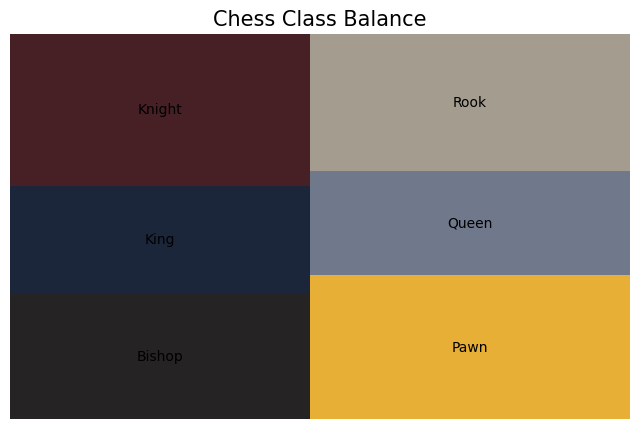

In [15]:
# defining the class name in the dataset
class_names = ["Bishop", "King", "Knight", "Pawn", "Queen", "Rook"]

# Get the number of images for each class
image_counts = [len(os.listdir(os.path.join("/content/Chessman-image-dataset/Chess", class_name))) for class_name in class_names]

# Create a squarify plot to find the spread of the dataset
fig, ax = plt.subplots(figsize = (8, 5))
colors = ["#252323", "#1B263B", "#462025", "#E7AF36", "#70798C", "#A39C8F"]
squarify.plot(image_counts, label = class_names, ax = ax, text_kwargs = {"fontsize": 10}, color = colors)
plt.title("Chess Class Balance", fontsize = 15)
plt.axis("off");

# printing the number of images in the dataset
print("Total number of images in the dataset:", sum(image_counts))
print("Number of images per class:", dict(zip(class_names, image_counts)))

From the squarify plot that represent the spread of chess piece data, we can gather the following insight

1. the dataset is mostly balance between all the 6 classes with around 70 - 100 data

2. the class with most images is pawn with 107 image and king having the least images

3. the amount of images is quite low so it is best if we add the data with data augmentation

from the insight of this data we can see that the data is balanced meaning that the data is less susceptible to over and under representation.

In [16]:
# generate batch of data using image data generator
IMG_SIZE = 224
path = '/content/Chessman-image-dataset/Chess'

datagen = tf.keras.preprocessing.image.ImageDataGenerator()
data = datagen.flow_from_directory(path, (IMG_SIZE, IMG_SIZE), batch_size=32, class_mode='categorical', shuffle=False)

Found 551 images belonging to 6 classes.


In [17]:
# Show images in pixel form

print('Images : ', data[0][0])
print('Shape  : ', data[0][0].shape)

Images :  [[[[124.  91.  58.]
   [124.  91.  58.]
   [123.  90.  57.]
   ...
   [125.  94.  74.]
   [126.  95.  75.]
   [126.  95.  75.]]

  [[123.  90.  59.]
   [123.  90.  59.]
   [122.  89.  56.]
   ...
   [118.  87.  66.]
   [119.  88.  68.]
   [119.  88.  68.]]

  [[120.  89.  60.]
   [120.  89.  60.]
   [119.  88.  57.]
   ...
   [109.  81.  57.]
   [110.  82.  60.]
   [110.  82.  60.]]

  ...

  [[245. 212. 141.]
   [245. 212. 141.]
   [247. 214. 145.]
   ...
   [241. 202. 135.]
   [239. 200. 135.]
   [239. 200. 135.]]

  [[255. 231. 159.]
   [255. 231. 159.]
   [255. 233. 161.]
   ...
   [236. 197. 128.]
   [232. 191. 125.]
   [232. 191. 125.]]

  [[251. 223. 150.]
   [251. 223. 150.]
   [253. 225. 152.]
   ...
   [224. 184. 114.]
   [219. 176. 108.]
   [219. 176. 108.]]]


 [[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 25

from this code we can see that from the first batch of 32 data. we can see that the shape of the data is 224x224. we can also see that it is made up of 3 color channel which is most likely RGB. we will standarize to make the color channel RGB in this model

In [20]:
# Show classes

print('Class  : ', data[0][1])
print('Shape  : ', data[0][1].shape)

Class  :  [[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
Shape  :  (32, 6)


From this code we can see that the data is in categorical format and not sparse or binary. we can also infer that the data is multiclass as there are 6 classes.

In [ ]:
# function to help visualize each class in the dataset

def visualize_samples_by_label(df, label, num_samples=20):
    samples = df[df['label'] == label]['images'].iloc[:num_samples].tolist()
    num_cols = min(num_samples, 5)
    num_rows = (num_samples - 1) // num_cols + 1
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 2 * num_rows))
    count = 0
    for i in range(num_rows):
        for j in range(num_cols):
            if count < len(samples):
                sample = samples[count]
                img = cv2.imread(sample)
                ax = axes[i, j]
                ax.set_title(sample.split('/')[-1].split('\\')[-1])
                ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                ax.axis('off')
                count += 1
    plt.tight_layout()
    plt.show()

this command is used to display images when calling a certain label. this command is helpfull in order to call the classes which will be furthered explained in the eda under this

### 1. Bishop

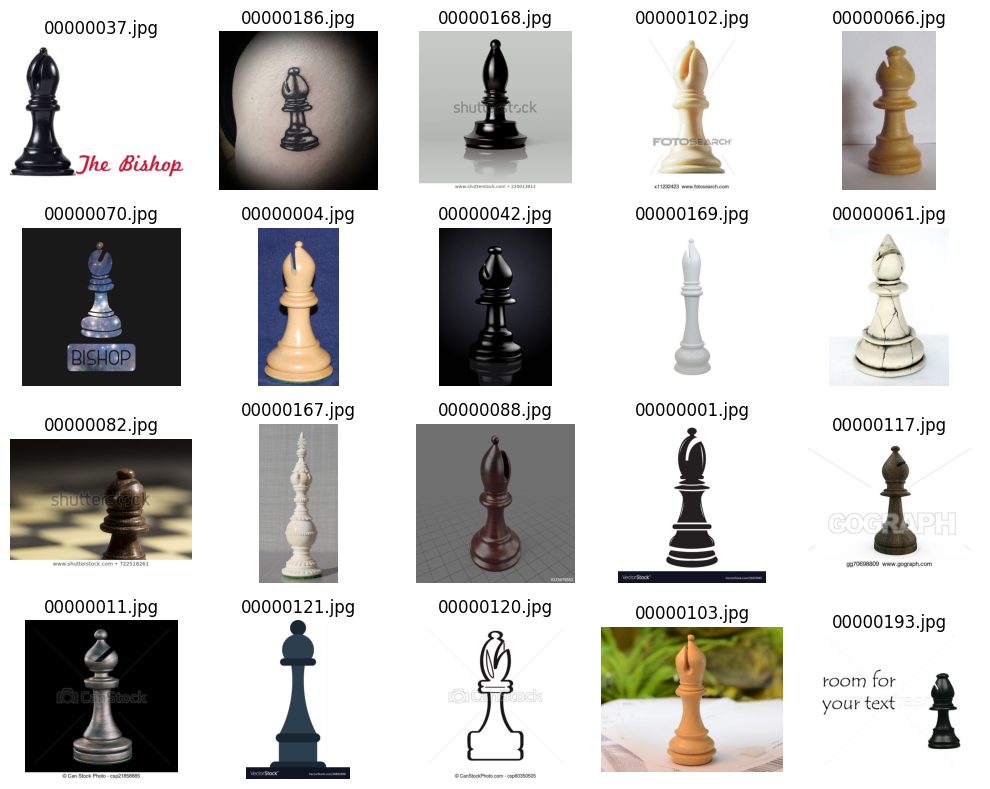

In [ ]:
# visualizing the bishop class
visualize_samples_by_label(img_df, 'bishop', num_samples=20)

from the visualization we can gather the following characteristics for the bishop piece

Shape:
- The bishop is has a rounded top with a slit in the middle which looks like the hat of a bishop

- The bishop is one of the tallest figure behind the king and queen piece

use in game:
- The bishop is considered a minor piece similar to the knight with a value of 3 pawns

- The bishop can only move diagonally infinitely unless blocked by other piece

References: https://www.chess.com/terms/chess-pieces#bishop

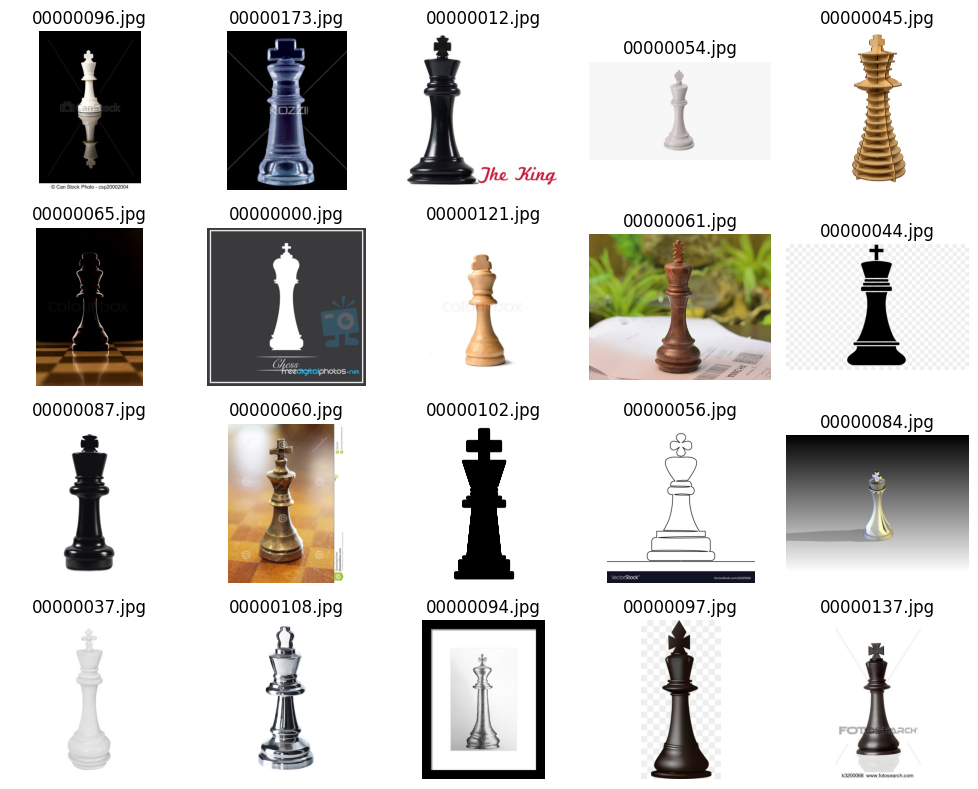

In [ ]:
# visualize the king piece
visualize_samples_by_label(img_df, 'king', num_samples=20)

from the visualization we can gather the following characteristics for the king piece

Shape:

- The king has a cross on top of its head which symbolize the crown the king wore

- The King is the tallest piece in chess

use in game:

- The king is the most important piece in chess as losing this piece means losing the game

- despite the king importance its one of the weakest piece behind a pawn as it can only move one square in any direction

References: https://www.chess.com/terms/chess-pieces#king

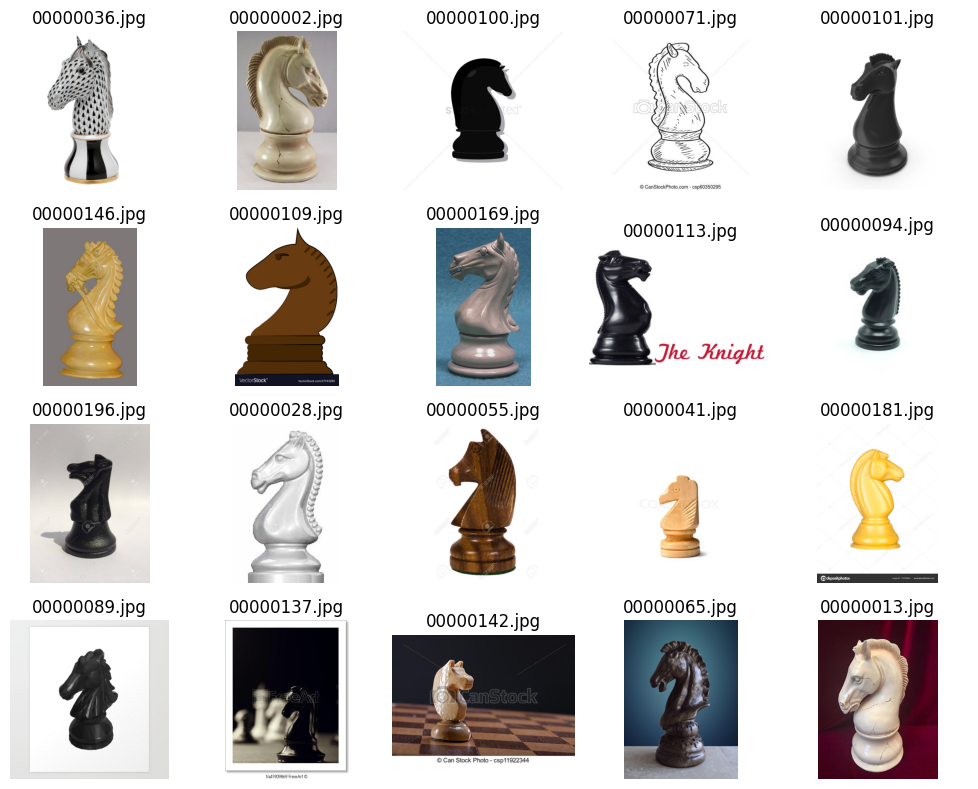

In [ ]:
# visualize the knight piece
visualize_samples_by_label(img_df, 'knight', num_samples=20)

from the visualization we can gather the following characteristics for the knight piece

Shape:

- The knight has a unique shape as it resembles the head of a horse

- The knight has an average height and size

use in game:

- The knight similar to the bishop is a minor piece with a value of 3 pawn

- the knight is notorious for its unique movement of an l shape and being the only piece that can jump over pieces which some argue make it slightly more important than a bishop

References: https://www.chess.com/terms/chess-pieces#knight

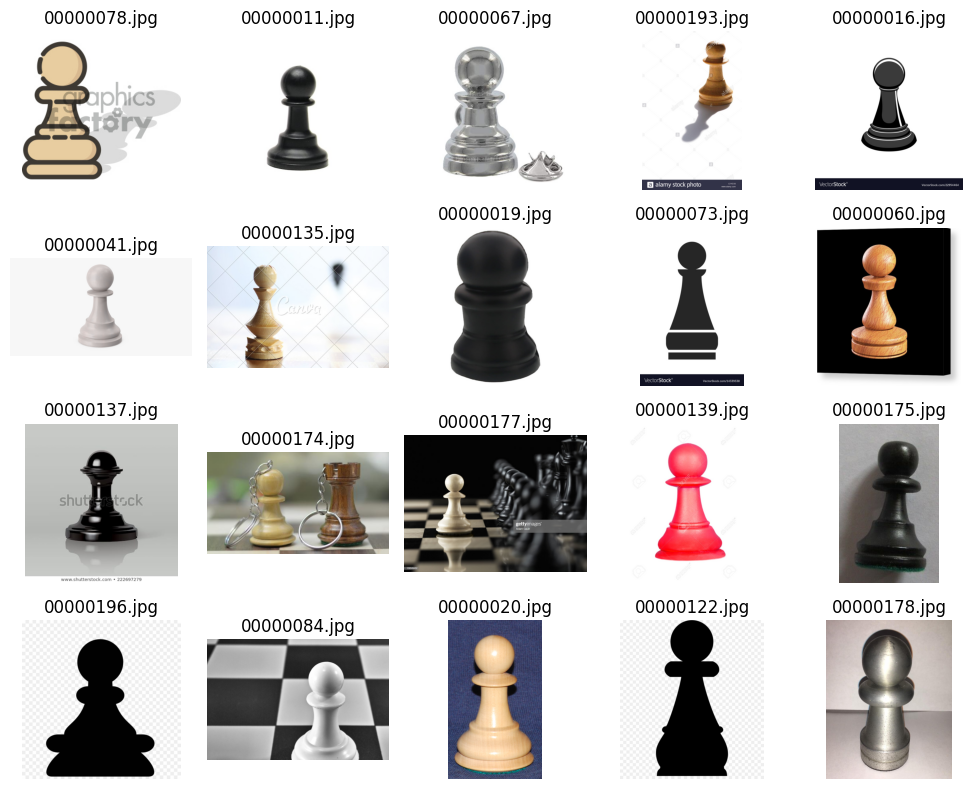

In [ ]:
# visualize the pawn piece
visualize_samples_by_label(img_df, 'pawn', num_samples=20)

from the visualization we can gather the following characteristics for the pawn piece

Shape:

- The Pawns are usually designed as simple, cylindrical shapes with a flat top.

- The Pawns is the smallest piece in the game

use in game:

- The pawn is the weakest piece in the game as it can only move one direction which is forward and only move one square except the beginning where it can move two and capture one piece diagonally

- Despite the pawn being the weakest piece, it could be one of the strongest piece due to how disposable and the threat they impose to higher value piece

References: https://www.chess.com/terms/chess-pieces#pawn

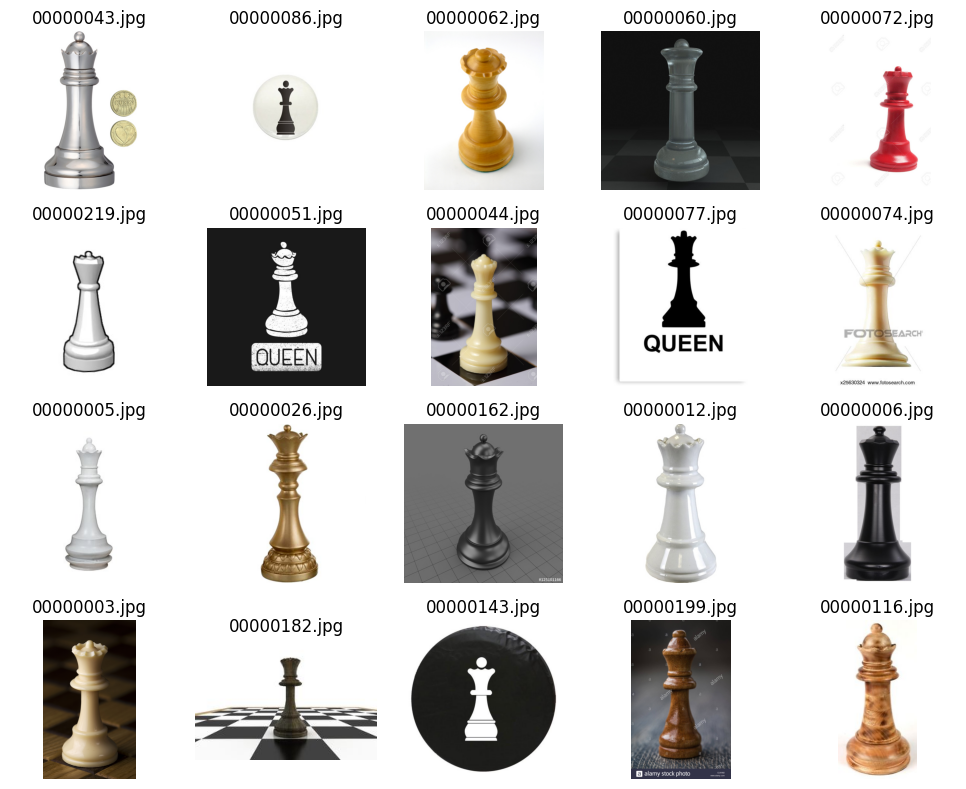

In [ ]:
# visualize the queen piece
visualize_samples_by_label(img_df, 'queen', num_samples=20)

from the visualization we can gather the following characteristics for the queen piece

Shape:

- The queen has main features is a crown or regal headdress atop its head

- The queen is the second highest piece in the game

use in game:

- The queen is the strongest piece in the game worth 9 pawns as it has the combined movement of a rook and a bishop thus having the most flexibility

- Due to the strength of the queen, it is important to protect it like a king as losing a queen will be a major disadvantage for the player

References: https://www.chess.com/terms/chess-pieces#queen

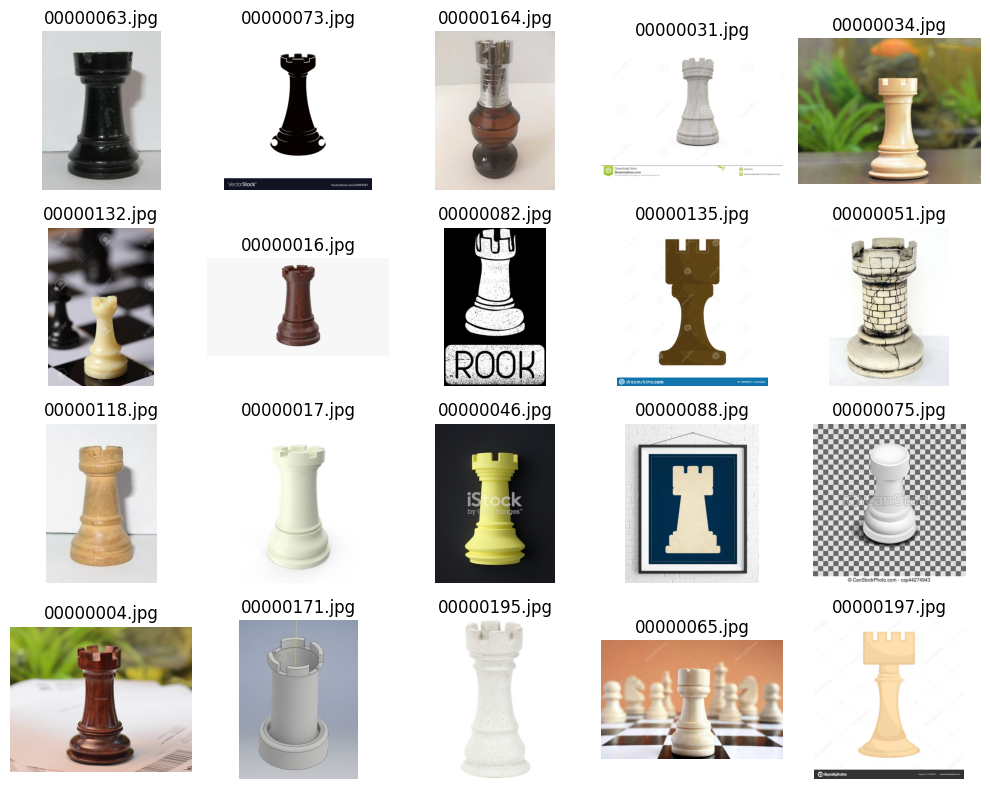

In [ ]:
# visualize the rook piece
visualize_samples_by_label(img_df, 'rook', num_samples=20)

from the visualization we can gather the following characteristics for the rook piece

Shape:

- The rook is shaped like a tower with a crenellated top resembling a castle turret

- The rook has an average heigh and size

use in game:

- The rook is a major piece worth 5 pawns

- The rook can move as many squares vertically or horizontally as long as its not blocked

References: https://www.chess.com/terms/chess-pieces#rook

### Eda Conclusion

- The Angle of the picture is taken from many side. some have the pictures on the side while some has it in the middle. the distance also vary from close to a bit further away

- the images from all class is very different in size, colours, etc

- the image also vary from logo and real pictures

- the images background is also very different which might affect the model accuracy

# Feature Engineering

In this topic we will prepare the data before creating the computer vision model. In this part we will split the data into two, namely feature x for the images and feature y for the labels, namely the name of the chess piece. Apart from that, we also divide the data into 3 files which consists of test, train, and validation. After that, we carry out the data augmentation process by shifting, zooming, and shearing to add to the complexity of the model and add to the training data.

### 1. Split feature (x) and Target (y)

In this part we will define the x feature which is the images in the data and the y feature which is the label or the chess piece they belong to

In [ ]:
# feature
X = 'images'
# target
y= 'label'

### 2. Split train, test, and val data

in this part we seperate the data into train, test, and validation using splitfolder. we then turn the splitted data into a dataframe

In [ ]:
# Splitting dataset into train, validation, and test
splitfolders.ratio("/content/Chessman-image-dataset/Chess",
                   output = "/content/Processed-dataset",
                   seed = 42,
                   ratio = (.7, .2, .1),
                   group_prefix = None,
                   move = False)

Copying files: 556 files [00:00, 3332.14 files/s]


in this code we split the dataset from the main folder into train, test, and val folder with 70% data into train 20% into validation and 10% into test

In [ ]:
# The directory where preprocessed dataset is located
pre_images_dir = '/content/Processed-dataset'

# Calculate the number of images in each class for train, validation, and test sets
train_image_counts = [len(os.listdir(os.path.join(pre_images_dir, "train", class_name))) for class_name in class_names]
val_image_counts = [len(os.listdir(os.path.join(pre_images_dir, "val", class_name))) for class_name in class_names]
test_image_counts = [len(os.listdir(os.path.join(pre_images_dir, "test", class_name))) for class_name in class_names]

# Convert the image count lists to numpy arrays
train_image_counts = np.array(train_image_counts)
val_image_counts = np.array(val_image_counts)
test_image_counts = np.array(test_image_counts)

In [ ]:
# Get a list of directories (train, val, test) in preprocessed dataset
main_directories = os.listdir(pre_images_dir)

# Loop through each main directory and get a list of sub-directories (class folders) in it
for main_directory in main_directories:
    main_directory_path = os.path.join(pre_images_dir, main_directory)
    sub_directories = os.listdir(main_directory_path)

    # Loop through each sub-directory (class) and get a list of all image paths
    for sub_directory in sub_directories:
        sub_directory_path = os.path.join(main_directory_path, sub_directory)
        image_paths = glob.glob(os.path.join(sub_directory_path, '*jpg'))

        # Loop through each image path and resize it
        for image_path in image_paths:
            img = cv2.imread(image_path)
            img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_CUBIC)
            img = img.astype(np.float32)
            cv2.imwrite(image_path, img)

this code is used to preprocess the newly created train, test, and val test by standarizing the image into 224,224 and replacing the original image into the standarized file

In [ ]:
# preprocessing the data to standarize the label, image size, and seed of the train data
train_data = tf.keras.preprocessing.image_dataset_from_directory('/content/Processed-dataset/train',
                                                                 label_mode = "categorical",
                                                                 image_size = (224, 224) ,
                                                                 seed = 42)

# preprocessing the data to standarize the label, image size, and seed of the validation data
val_data = tf.keras.preprocessing.image_dataset_from_directory('/content/Processed-dataset/val',
                                                                label_mode = "categorical",
                                                                image_size = (224, 224),
                                                                seed = 42)

# preprocessing the data to standarize the label, image size, and seed of the test data
test_data = tf.keras.preprocessing.image_dataset_from_directory('/content/Processed-dataset/test',
                                                                label_mode = "categorical",
                                                                image_size = (224, 224),
                                                                seed = 42,
                                                                shuffle = False)

Found 383 files belonging to 6 classes.
Found 108 files belonging to 6 classes.
Found 61 files belonging to 6 classes.


in this step we preprocess the data to change the label form into categorical, change the image size into 224,224, and setting the random seed of 42

In [ ]:
# defining the split data into the val split_path
split_path = pre_images_dir
print(os.listdir(split_path))

# defining the directory of the train, test, and val
train_dir = os.path.join(split_path, 'train')
test_dir = os.path.join(split_path, 'test')
val_dir = os.path.join(split_path, 'val')
print(train_dir)
print(test_dir)
print(val_dir)

['train', 'val', 'test']
/content/Processed-dataset/train
/content/Processed-dataset/test
/content/Processed-dataset/val


in this code we make a value to read the train,test, and val folder to make it easier to call for the code after this

In [ ]:
# combining the train images into one value
train_bishop = glob.glob(train_dir + '/Bishop/*.jpg') + glob.glob(train_dir + '/Bishop/*.png') + glob.glob(train_dir + '/Bishop/*.jpeg') + glob.glob(train_dir + '/Bishop/*.JPG') + glob.glob(train_dir + '/Bishop/*.gif')
train_king = glob.glob(train_dir + '/King/*.jpg') + glob.glob(train_dir + '/King/*.png') + glob.glob(train_dir + '/King/*.jpeg') + glob.glob(train_dir + '/King/*.JPG') + glob.glob(train_dir + '/King/*.gif')
train_knight = glob.glob(train_dir + '/Knight/*.jpg') + glob.glob(train_dir + '/Knight/*.png') + glob.glob(train_dir + '/Knight/*.jpeg') + glob.glob(train_dir + '/Knight/*.JPG') + glob.glob(train_dir + '/Knight/*.gif')
train_pawn = glob.glob(train_dir + '/Pawn/*.jpg') + glob.glob(train_dir + '/Pawn/*.png') + glob.glob(train_dir + '/Pawn/*.jpeg') + glob.glob(train_dir + '/Pawn/*.JPG') + glob.glob(train_dir + '/Pawn/*.gif')
train_queen = glob.glob(train_dir + '/Queen/*.jpg') + glob.glob(train_dir + '/Queen/*.png') + glob.glob(train_dir + '/Queen/*.jpeg') + glob.glob(train_dir + '/Queen/*.JPG') + glob.glob(train_dir + '/Queen/*.gif')
train_rook = glob.glob(train_dir + '/Rook/*.jpg') + glob.glob(train_dir + '/Rook/*.png') + glob.glob(train_dir + '/Rook/*.jpeg') + glob.glob(train_dir + '/Rook/*.JPG') + glob.glob(train_dir + '/Rook/*.gif')

# combining the test images into one value
test_bishop = glob.glob(test_dir + '/Bishop/*.jpg') + glob.glob(test_dir + '/Bishop/*.png') + glob.glob(test_dir + '/Bishop/*.jpeg') + glob.glob(test_dir + '/Bishop/*.JPG') + glob.glob(test_dir + '/Rook/*.gif')
test_king = glob.glob(test_dir + '/King/*.jpg') + glob.glob(test_dir + '/King/*.png') + glob.glob(test_dir + '/King/*.jpeg') + glob.glob(test_dir + '/King/*.JPG') + glob.glob(test_dir + '/King/*.gif')
test_knight = glob.glob(test_dir + '/Knight/*.jpg') + glob.glob(test_dir + '/Knight/*.png') + glob.glob(test_dir + '/Knight/*.jpeg') + glob.glob(test_dir + '/Knight/*.JPG') + glob.glob(test_dir + '/Knight/*.gif')
test_pawn = glob.glob(test_dir + '/Pawn/*.jpg') + glob.glob(test_dir + '/Pawn/*.png') + glob.glob(test_dir + '/Pawn/*.jpeg') + glob.glob(test_dir + '/Pawn/*.JPG') + glob.glob(test_dir + '/Pawn/*.gif')
test_queen = glob.glob(test_dir + '/Queen/*.jpg') + glob.glob(test_dir + '/Queen/*.png') + glob.glob(test_dir + '/Queen/*.jpeg') + glob.glob(test_dir + '/Queen/*.JPG') + glob.glob(test_dir + '/Queen/*.gif')
test_rook = glob.glob(test_dir + '/Rook/*.jpg') + glob.glob(test_dir + '/Rook/*.png') + glob.glob(test_dir + '/Rook/*.jpeg') + glob.glob(test_dir + '/Rook/*.JPG') + glob.glob(test_dir + '/Rook/*.gif')

# combining the validation images into one value
val_bishop = glob.glob(val_dir + '/Bishop/*.jpg') + glob.glob(val_dir + '/Bishop/*.png') + glob.glob(val_dir + '/Bishop/*.jpeg') + glob.glob(val_dir + '/Bishop/*.JPG') + glob.glob(val_dir + '/Bishop/*.gif')
val_king = glob.glob(val_dir + '/King/*.jpg') + glob.glob(val_dir + '/King/*.png') + glob.glob(val_dir + '/King/*.jpeg') + glob.glob(val_dir + '/King/*.JPG') + glob.glob(val_dir + '/King/*.gif')
val_knight = glob.glob(val_dir + '/Knight/*.jpg') + glob.glob(val_dir + '/Knight/*.png') + glob.glob(val_dir + '/Knight/*.jpeg') + glob.glob(val_dir + '/Knight/*.JPG') + glob.glob(val_dir + '/Knight/*.gif')
val_pawn = glob.glob(val_dir + '/Pawn/*.jpg') + glob.glob(val_dir + '/Pawn/*.png') + glob.glob(val_dir + '/Pawn/*.jpeg') + glob.glob(val_dir + '/Pawn/*.JPG') + glob.glob(val_dir + '/Pawn/*.gif')
val_queen = glob.glob(val_dir + '/Queen/*.jpg') + glob.glob(val_dir + '/Queen/*.png') + glob.glob(val_dir + '/Queen/*.jpeg') + glob.glob(val_dir + '/Queen/*.JPG') + glob.glob(val_dir + '/Queen/*.gif')
val_rook = glob.glob(val_dir + '/Rook/*.jpg') + glob.glob(val_dir + '/Rook/*.png') + glob.glob(val_dir + '/Rook/*.jpeg') + glob.glob(val_dir + '/Rook/*.JPG') + glob.glob(val_dir + '/Rook/*.gif')

this code is used to combine all the images into one dataset

In [ ]:
# creating a function to create a dataframe
def create_dataframe(list_of_images):
  data=[]
  for image in list_of_images:
    data.append((image, image.split('/')[-2]))

  return pd.DataFrame(data, columns= ['images', 'label'])

# making the train data into a dataframe
train_df = create_dataframe(train_bishop + train_king + train_knight + train_pawn + train_queen + train_rook)
train_df = train_df.sample(frac=1, random_state=7).reset_index(drop=True)

# making the test data into a dataframe
test_df = create_dataframe(test_bishop + test_king + test_knight + test_pawn + test_queen + test_rook)
test_df = test_df.sample(frac=1, random_state=7).reset_index(drop=True)

# making the validation data into a dataframe
val_df = create_dataframe(val_bishop + val_king + val_knight + val_pawn + val_queen + val_rook)
val_df = val_df.sample(frac=1, random_state=7).reset_index(drop=True)

this code is used to create a dataframe in order to help view the images and the labels

In [ ]:
# checking the dataframe for the test data
print(test_df)

                                               images   label
0   /content/Processed-dataset/test/Queen/00000014...   Queen
1   /content/Processed-dataset/test/Bishop/0000018...  Bishop
2   /content/Processed-dataset/test/Pawn/00000039.jpg    Pawn
3   /content/Processed-dataset/test/Knight/0000019...  Knight
4   /content/Processed-dataset/test/King/00000063....    King
..                                                ...     ...
56  /content/Processed-dataset/test/Bishop/0000007...  Bishop
57  /content/Processed-dataset/test/Rook/00000046.jpg    Rook
58  /content/Processed-dataset/test/Knight/0000002...  Knight
59  /content/Processed-dataset/test/Bishop/0000006...  Bishop
60  /content/Processed-dataset/test/Queen/00000022...   Queen

[61 rows x 2 columns]


this code is used to see the dataframe of the test_df

### 3. Data Augmentation

in this part we do data augmentation in order to augment the data to not only increase the variety of data that is trained but also to reduce overfitting to improve the model ability to generalize unseen data

In [ ]:
# creating the data augmentation for the train data
data_augmentation = ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.1,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# creating the data augmentation for the validation and test data
test_augmentation = ImageDataGenerator(rescale=1./255)

this code is used to define the augmentation of the data. the augmentation that is used is rescaling to scale the pixel value, rotation range to rotate the image, width and height shift to shift horizontally or vertically, shear range to distort the image, zoom range to zoom the image, horizontal and vertical flip to flip the image, and fill mode to fill the missing pixel with the nearest pixel which can happen after the augmentation

In [ ]:
# create the trained data that has been augmented
train_augmentation = data_augmentation.flow_from_directory(
    '/content/Processed-dataset/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# create the validation data that has been augmented
val_augmentation = test_augmentation.flow_from_directory(
    '/content/Processed-dataset/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# create the test data that has been augmented
test_augmentation = test_augmentation.flow_from_directory(
    '/content/Processed-dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 382 images belonging to 6 classes.
Found 108 images belonging to 6 classes.
Found 61 images belonging to 6 classes.


this code is used to apply the augmentation that has been defined perviously into the train, test, and val data, the train data is augmented using the data_augmentation which will be sheared,zoomed,etc but train and val will only be rescaled

In [ ]:
# print the label of the first batch and number of class
for i, (batch_x, batch_y) in enumerate(train_augmentation):
    print("First five labels:")
    print(batch_y[:5])  # Print the first 5 labels

# Check the number of classes
    num_classes = train_augmentation.num_classes
    print("Number of classes:", num_classes)

    break


First five labels:
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]
Number of classes: 6


this code is used to print the label of the train after augmentation. we can see that the label is in categorical form so we will be using categorical crossentropy for the model

# Model Definition

In this part we will carry out the computer vision model definition by using the sequential cnn architecture. this is done by using conv2d, batch normalization, maxpooling2d, and flatten. after that we will try to improve the model using transfer learning of vgg19, we use vgg19 compared to other model like vgg16 as vgg19 have a deeper layer compared to other model as it can potentially capture more intricate features and patterns in the data.

Reference:https://medium.com/@sohaib.zafar522/choosing-the-right-pre-trained-model-a-guide-to-vggnet-resnet-googlenet-alexnet-and-inception-db7a8c918510

In [ ]:
# creating a callback for the model
EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                 patience = 5)

model_checkpoint = tf.keras.callbacks.ModelCheckpoint('Data/Checkpoint',
                                                      save_best_only = True,
                                                      monitor = "val_loss")


### A. Sequential (Base Model)

in this part we will use the sequential cnn architecture in order to train the computer vision using a sequential model. we use categorical entropy as the data is in categorical form and we use adam as it is an improvement from RMSprop and have adaptive learning capability unlike SGD. we will also measure the model based on accuracy

In [ ]:
# creating the sequential model
model = keras.Sequential([
  Conv2D(filters=32,
         kernel_size=3,
         strides=2,
         activation='relu',
         input_shape=(224, 224, 3)),
  BatchNormalization(),
  MaxPooling2D(pool_size=2, strides=2),
  Conv2D(filters=64,
         kernel_size=3,
         strides=2),
  Activation(activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=2, strides=2),
  Flatten(),
  Dense(units=64,
        activation='relu'),
  Dense(units=64,
        activation='relu'),
  Dense(6, activation='softmax')])

# Print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 111, 111, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 111, 111, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 55, 55, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 64)        18496     
                                                                 
 activation (Activation)     (None, 27, 27, 64)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 27, 27, 64)        2

In [ ]:
# compile the sequential model
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

### B. Using Transfer Learning VGG19 (Model Improvement)

in this part we will use the the transfer learning cnn architecture VGG19 in order to train the computer vision. we do this in hopes to improve the base model accuracy. the method used will use different filter for conv2d, using globalmaxpooling instead of flatten, and differing amount of dense layer

In [ ]:
# creating the VGG19 model
improve_model = tf.keras.applications.VGG19(include_top = False)
improve_model.trainable = False

inputs = tf.keras.Input(shape = (224, 224, 3))

x = improve_model(inputs)
x = layers.Dropout(0.4)(x)

x = layers.Conv2D(256, 3, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Conv2D(256, 3, activation = 'relu', padding = 'same')(x)
x = layers.MaxPooling2D(pool_size=2, strides=2)(x)
x = layers.Dropout(0.5)(x)

x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = layers.Dropout(0.6)(x)

x = layers.Dense(units=256 , activation='relu')(x)
x = layers.Dropout(0.5)(x)

x = layers.Dense(6)(x) # Output layer
outputs = layers.Activation("softmax")(x)

# Create the model
model_tf = tf.keras.Model(inputs, outputs)

# print the model summary
model_tf.summary()



80134624/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         1179904   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 256)         590080 

In [ ]:
# Compile the transfer learning model
model_tf.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

# Model Training

After defining the model we train the model using 50 epoch with the callback we defined earlier

### A. Sequential

In [ ]:
# training the model using the sequential architecture
history= model.fit(train_augmentation, batch_size= 32,
                  epochs= 50, validation_data= val_augmentation,
                  callbacks= [EarlyStopping, model_checkpoint])

Epoch 1/50
12/12 [==============================] - 13s 607ms/step - loss: 2.6908 - accuracy: 0.1387 - val_loss: 1.7804 - val_accuracy: 0.1944
Epoch 2/50
12/12 [==============================] - 8s 624ms/step - loss: 2.3703 - accuracy: 0.1597 - val_loss: 1.8139 - val_accuracy: 0.1759
Epoch 3/50
12/12 [==============================] - 5s 444ms/step - loss: 2.1819 - accuracy: 0.2199 - val_loss: 1.8400 - val_accuracy: 0.1389
Epoch 4/50
12/12 [==============================] - 6s 492ms/step - loss: 2.0027 - accuracy: 0.2068 - val_loss: 1.8816 - val_accuracy: 0.1481
Epoch 5/50
12/12 [==============================] - 5s 447ms/step - loss: 1.9513 - accuracy: 0.2251 - val_loss: 1.8927 - val_accuracy: 0.1667
Epoch 6/50
12/12 [==============================] - 7s 582ms/step - loss: 1.9859 - accuracy: 0.1832 - val_loss: 1.8768 - val_accuracy: 0.1667


### B. Using Transfer Learning VGG19

In [ ]:
# training the model using the vgg19 architecture
history_improve = model_tf.fit(train_augmentation,
                  epochs = 50,
                  batch_size = 32,
                  steps_per_epoch = len(train_augmentation),
                  validation_data = val_augmentation,
                  validation_steps = len(val_augmentation),
                  callbacks = [EarlyStopping, model_checkpoint])

Epoch 1/50
12/12 [==============================] - 24s 1s/step - loss: 2.7478 - accuracy: 0.1597 - val_loss: 1.7836 - val_accuracy: 0.1944
Epoch 2/50
12/12 [==============================] - 11s 954ms/step - loss: 1.8604 - accuracy: 0.1702 - val_loss: 1.7797 - val_accuracy: 0.3426
Epoch 3/50
12/12 [==============================] - 6s 525ms/step - loss: 1.8062 - accuracy: 0.1545 - val_loss: 1.7809 - val_accuracy: 0.2593
Epoch 4/50
12/12 [==============================] - 11s 904ms/step - loss: 1.7871 - accuracy: 0.1728 - val_loss: 1.7698 - val_accuracy: 0.3056
Epoch 5/50
12/12 [==============================] - 11s 912ms/step - loss: 1.7835 - accuracy: 0.1702 - val_loss: 1.7487 - val_accuracy: 0.5093
Epoch 6/50
12/12 [==============================] - 10s 826ms/step - loss: 1.7638 - accuracy: 0.2330 - val_loss: 1.6982 - val_accuracy: 0.4259
Epoch 7/50
12/12 [==============================] - 11s 909ms/step - loss: 1.7131 - accuracy: 0.2853 - val_loss: 1.6245 - val_accuracy: 0.4074
Epo

# Model Evaluation

After training the model we can evaluate the performance of the model. we will evaluate this using plot to see the line chart of the accuracy and loss, we will also see the classification report and the confusion matrix of the result

### A. Sequential

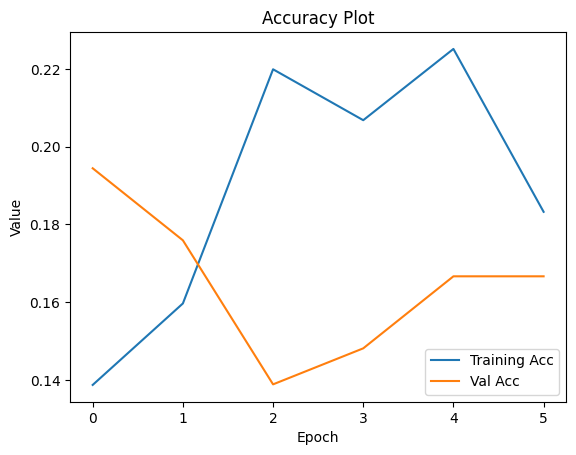

In [ ]:
# plot the accuracy of the sequential model
plt.plot(history.history['accuracy'], label='Training Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

from this line chart we can see that the accuracy peaked at the 4th epoch with a drop in the 5th. apart from that the overall accuracy of both is still low of under 25% meaning that the sequential model cant correctly predict the images in the training and validation data.

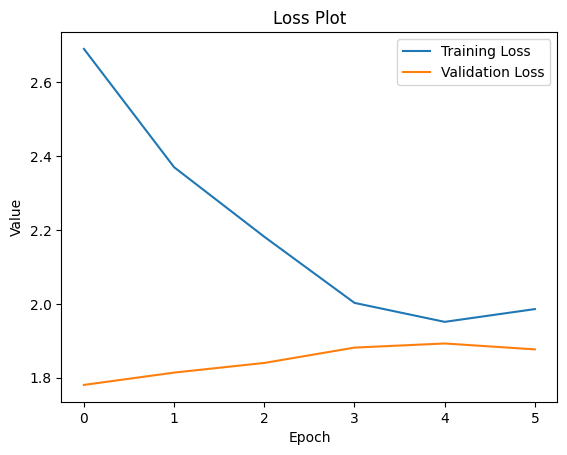

In [ ]:
# plot the loss of train and validation
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

from this line chart we can see that the validation loss is increasing while the training loss is decreasing. after looking at both the accuracy and loss we can conclude that this sequential model is heavily underfit which can be seen from the low accuracy and increasing loss

In [ ]:
# result Loss and Accuracy
test_results = model.evaluate(test_augmentation, verbose=0)
print(f'Test Loss     : {test_results[0]:.4f}')
print(f'Test Accuracy : {test_results[1]:.4f}')

Test Loss     : 1.8435
Test Accuracy : 0.2295


from this we can see that the test loss is high at 1.8 meaning that the prediction is usually off by 1.8 which is huge. and we can also see that the model can accurately predict the test by 22%

In [ ]:
# Predict test data
prediction = model.predict(test_augmentation)

2/2 [==============================] - 0s 79ms/step


In [ ]:
# defining the y_pred
y_pred = np.argmax(model.predict(test_augmentation), axis=-1)
y_pred

2/2 [==============================] - 0s 46ms/step


array([2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 5, 2, 2, 5, 2, 2, 0, 2, 2, 2,
       5, 0, 5, 2, 5, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 3, 2, 3])

In [ ]:
# create class name
class_names = ["Bishop", "King", "Knight", "Pawn", "Queen", "Rook"]

In [ ]:
# change number to string in class
y_pred1=np.array(class_names)[y_pred]

In [ ]:
# create dataframe to save prediction
pred_result_pred = pd.DataFrame(y_pred1, columns=['y_pred'])

In [ ]:
# reset index
test_df_reset = test_df.reset_index(drop=True)


In [ ]:
# concat label and y_pred
result_model_pred1 = pd.concat([test_df_reset, pred_result_pred], axis=1)
result_model_pred1 = result_model_pred1.reset_index(drop=True)
result_model_pred1[['label', 'y_pred']]

,label,y_pred
0,Queen,Knight
1,Bishop,Knight
2,Pawn,Knight
3,Knight,Knight
4,King,Knight
...,...,...
56,Bishop,Rook
57,Rook,Pawn
58,Knight,Pawn
59,Bishop,Knight


In [ ]:
# defining the true label (class names) from the augmented test data
true_labels = test_augmentation.classes
true_labels = np.array([class_names[i] for i in true_labels])

In [ ]:
# printing the classification report
print('Best Model classification report test : \n',classification_report(result_model_pred1['label'], result_model_pred1['y_pred']))

Best Model classification report test : 
               precision    recall  f1-score   support

      Bishop       0.25      0.10      0.14        10
        King       0.00      0.00      0.00         8
      Knight       0.17      0.73      0.28        11
        Pawn       0.00      0.00      0.00        12
       Queen       0.00      0.00      0.00         9
        Rook       0.17      0.09      0.12        11

    accuracy                           0.16        61
   macro avg       0.10      0.15      0.09        61
weighted avg       0.10      0.16      0.09        61



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


from this classification we can see that the accuracy of the test data is low at 16% meaning that the model could still be improved, hence why we try to use transfer learning

<Axes: >

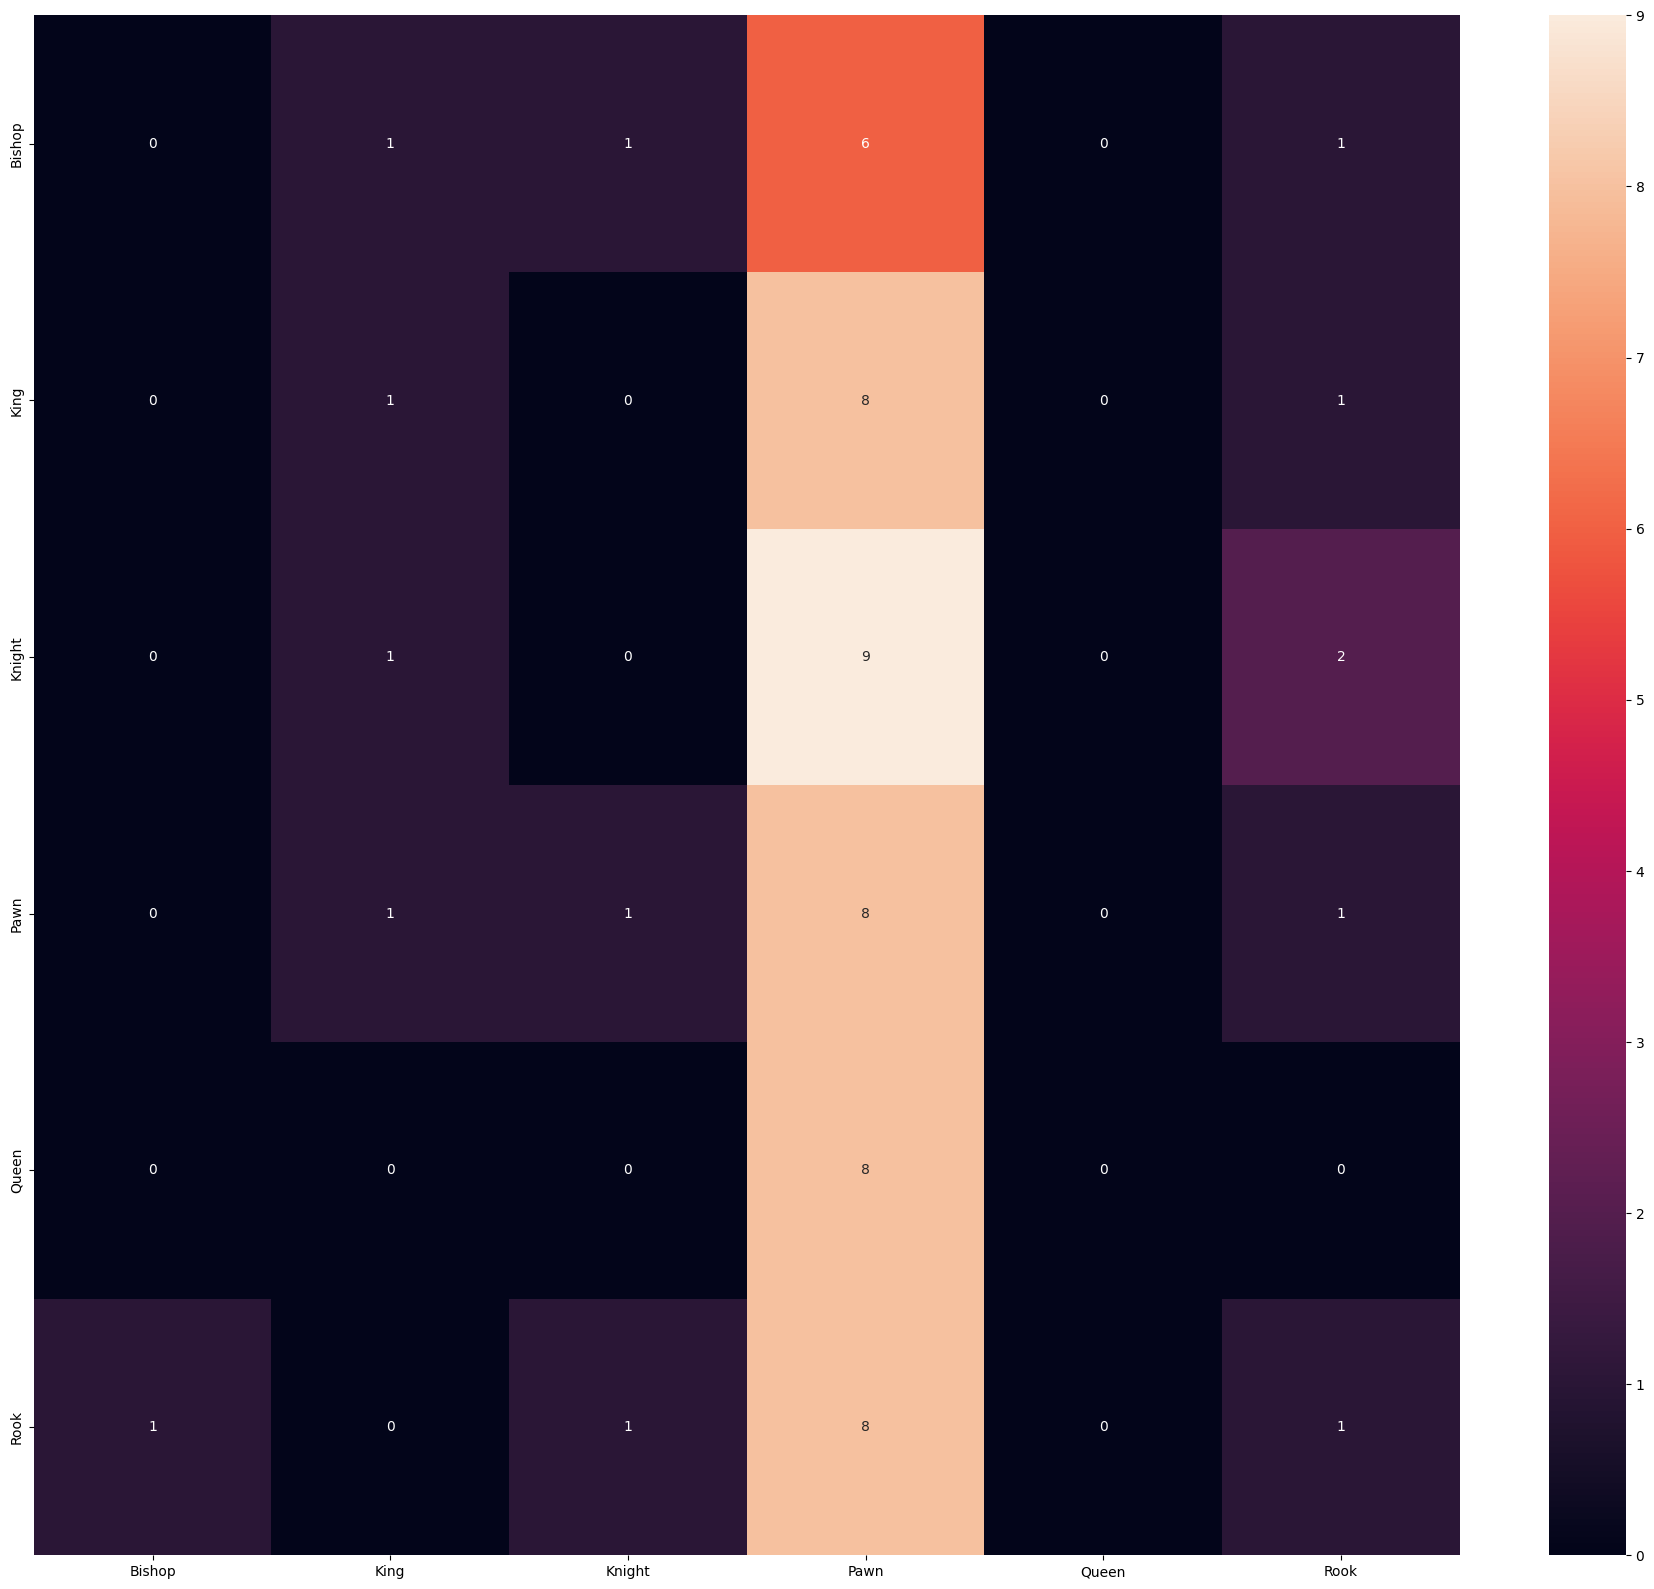

In [ ]:
# Display Confussion Matrix

np.set_printoptions(suppress=True)

plt.figure(figsize=(23, 20))
model_confussionmatrix = confusion_matrix(result_model_pred1['label'], result_model_pred1['y_pred'], labels=result_model_pred1['label'].unique())
sns.heatmap(model_confussionmatrix, annot=True , xticklabels=class_names, yticklabels=class_names)

from this confusion matrix we can see that the model still have a lot of error. so we can try to minimize this using the transfer learning

### B. Using Transfer Learning VGG19

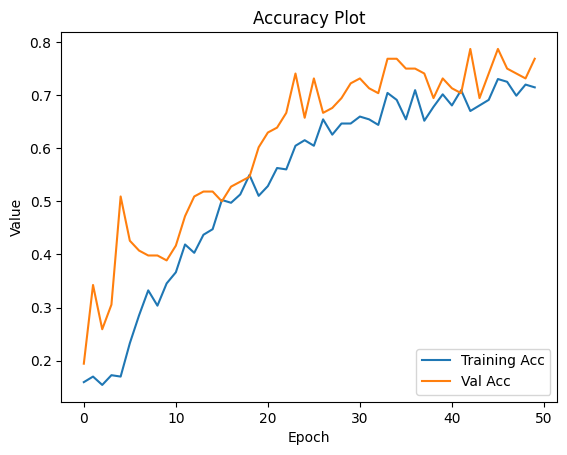

In [ ]:
# plot the accuracy of the sequential model
plt.plot(history_improve.history['accuracy'], label='Training Acc')
plt.plot(history_improve.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

from this line chart we can see that the accuracy peaked at the 50th epoch. the overall accuracy could still be improved at around 70% for both train and validation test. this is a major improvement from before but could still be improved

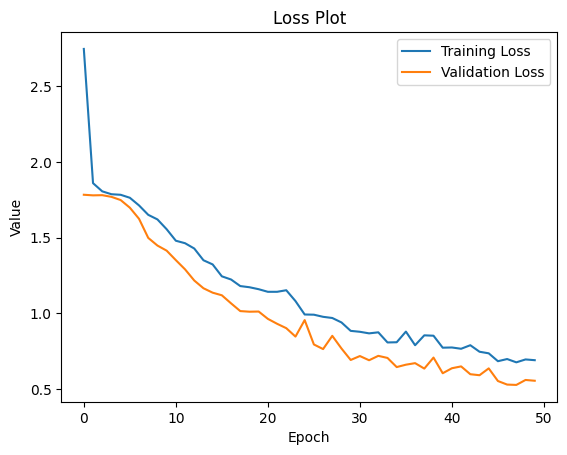

In [ ]:
#loss train & validation
plt.plot(history_improve.history['loss'], label='Training Loss')
plt.plot(history_improve.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.ylabel('Value')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

from this line chart we can see that the loss is decreasing means that the model is improving which can also be seen in the accuracy becoming higher from the previous plot. from the result of the loss and accuracy, we can see that the data is becoming a good fit. despite this the model and accuracy could still be imprvoed

In [ ]:
# result Loss and Accuracy
test_results2 = model_tf.evaluate(test_augmentation, verbose=0)
print(f'Test Loss     : {test_results2[0]:.4f}')
print(f'Test Accuracy : {test_results2[1]:.4f}')

Test Loss     : 0.7826
Test Accuracy : 0.7213


from this we can see that the test loss is lower at 0.7 meaning that the prediction is usually off by 1.8 which is still a big amount but its an improvement from the previous model. and we can also see that the model can accurately predict the test by 72%

In [ ]:
# predict using Transfer learning model
prediction2 = model_tf.predict(test_augmentation)

2/2 [==============================] - 0s 180ms/step


In [ ]:
# defining the y_pred2
y_pred2 = np.argmax(model_tf.predict(test_augmentation), axis=-1)
y_pred2

2/2 [==============================] - 0s 179ms/step


array([0, 4, 0, 0, 5, 3, 1, 2, 0, 3, 2, 1, 4, 4, 2, 1, 5, 3, 2, 0, 0, 2,
       0, 5, 4, 5, 5, 0, 5, 2, 1, 0, 3, 4, 3, 0, 2, 0, 1, 5, 0, 3, 4, 4,
       3, 5, 4, 1, 5, 2, 0, 1, 0, 4, 5, 5, 1, 0, 2, 0, 5])

In [ ]:
# change number to string in class
y_pred2=np.array(class_names)[y_pred2]

In [ ]:
# create dataframe
pred_result_pred2 = pd.DataFrame(y_pred2, columns=['y_pred_improve'])

In [ ]:
# concat test data and result prediction
result_model_pred2 = pd.concat([test_df_reset, pred_result_pred2], axis=1)
result_model_pred2 = result_model_pred2.reset_index(drop=True)
result_model_pred2[['label', 'y_pred_improve']]

,label,y_pred_improve
0,Queen,Bishop
1,Bishop,Queen
2,Pawn,Bishop
3,Knight,Bishop
4,King,Rook
...,...,...
56,Bishop,King
57,Rook,Bishop
58,Knight,Knight
59,Bishop,Bishop


In [ ]:
# printing the classification report
print('Best Model classification report test : \n',classification_report(result_model_pred2['label'], result_model_pred2['y_pred_improve']))

Best Model classification report test : 
               precision    recall  f1-score   support

      Bishop       0.31      0.50      0.38        10
        King       0.25      0.25      0.25         8
      Knight       0.22      0.18      0.20        11
        Pawn       0.14      0.08      0.11        12
       Queen       0.33      0.33      0.33         9
        Rook       0.25      0.27      0.26        11

    accuracy                           0.26        61
   macro avg       0.25      0.27      0.26        61
weighted avg       0.25      0.26      0.25        61



from this classification we can see that the accuracy of the test data is low at 26% meaning that the model could still be improved

<Axes: >

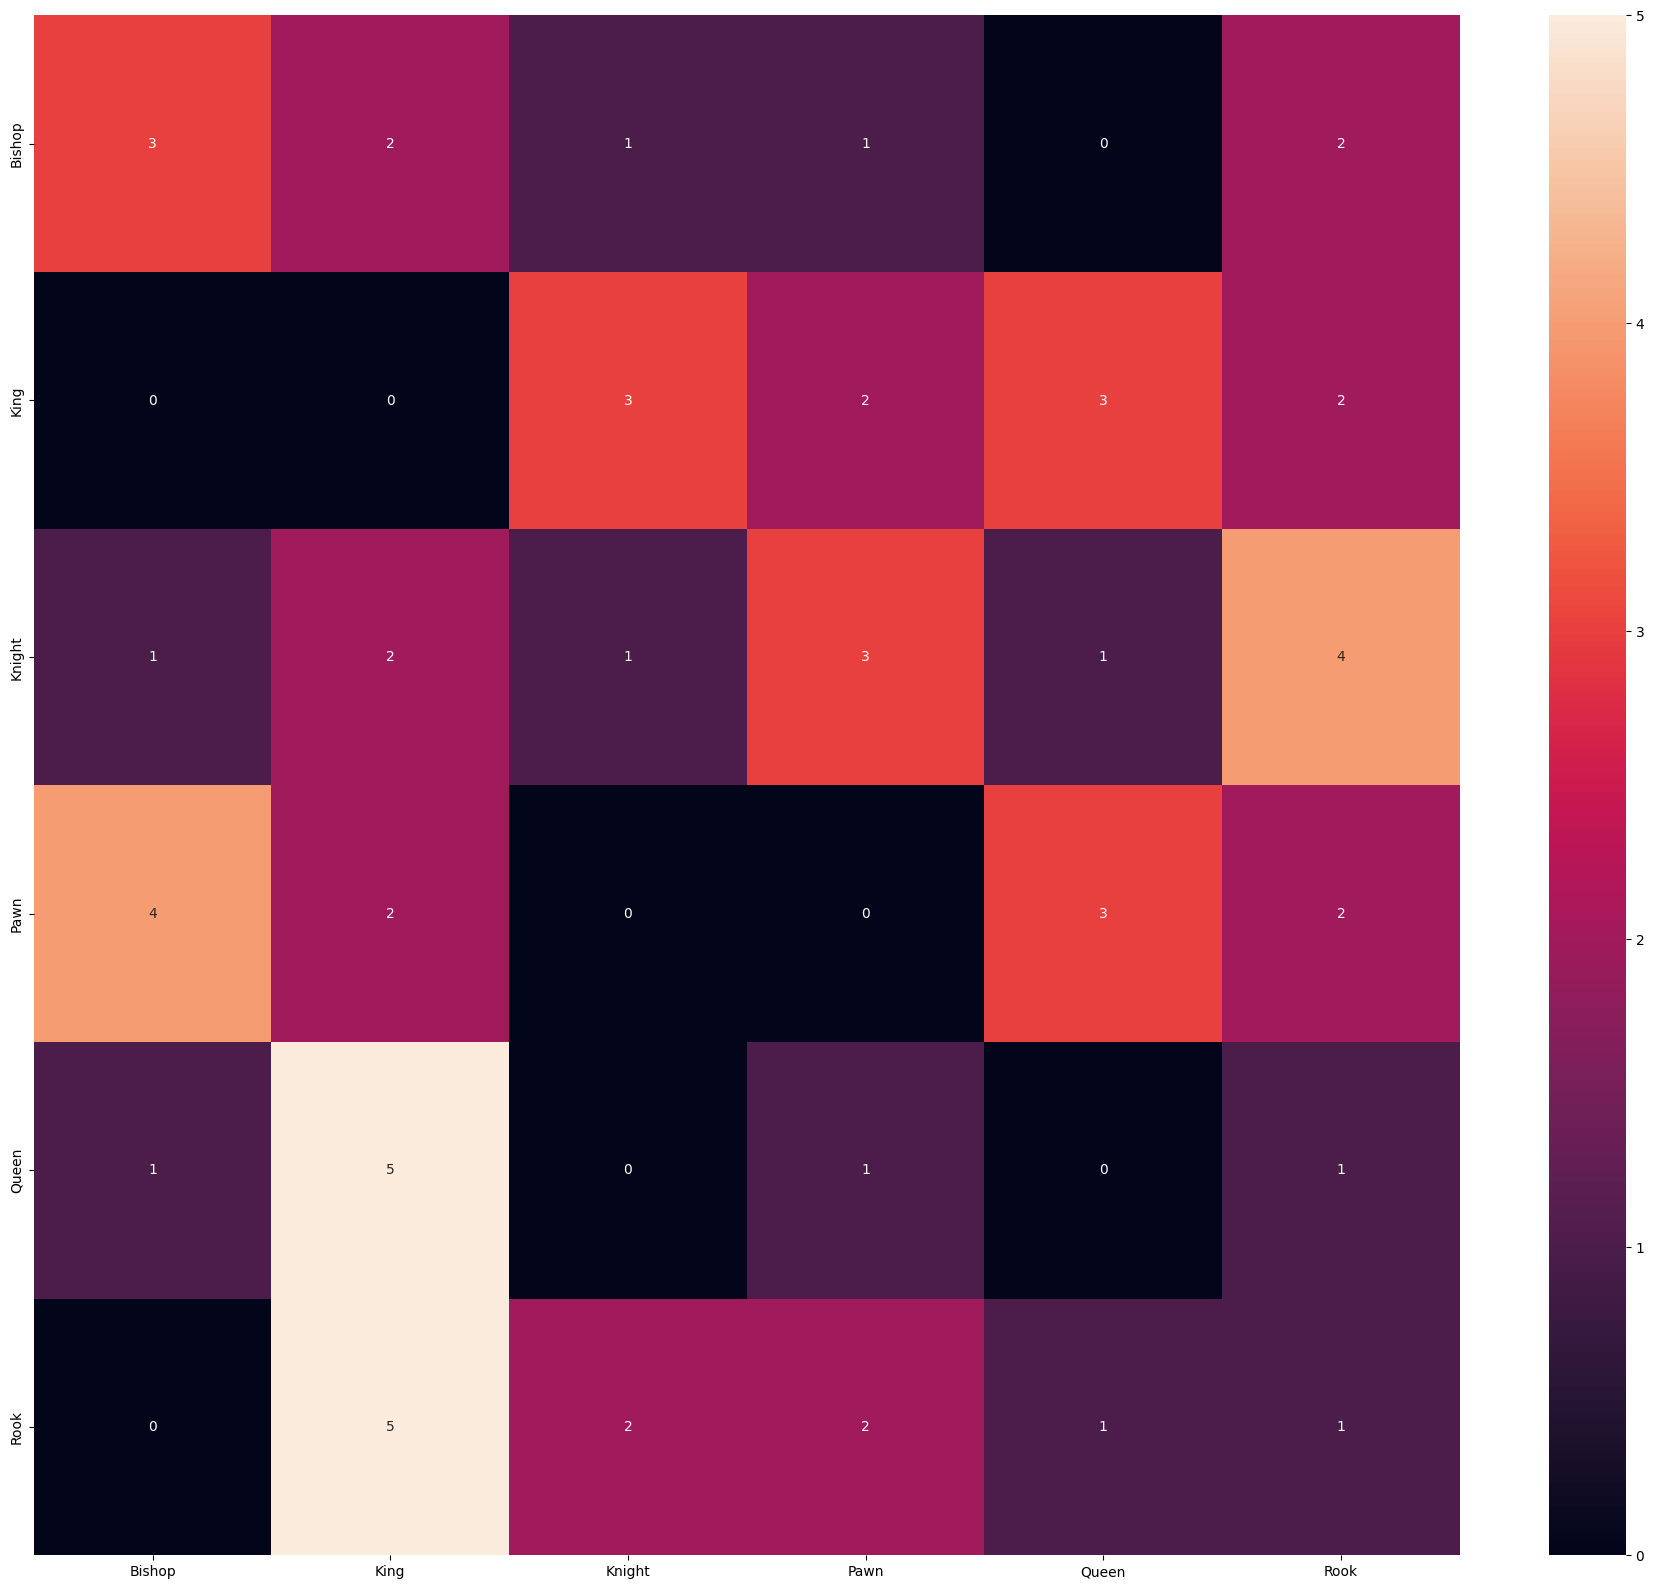

In [ ]:
# Display Confussion Matrix

np.set_printoptions(suppress=True)

plt.figure(figsize=(23, 20))
model_confussionmatrix = confusion_matrix(result_model_pred2['label'], result_model_pred2['y_pred_improve'], labels=result_model_pred2['label'].unique())
sns.heatmap(model_confussionmatrix, annot=True , xticklabels=class_names, yticklabels=class_names)

from this confusion matrix we can see that the model still have a lot of error. so we can try to minimize this by adjusting the model or the augmentation of the data

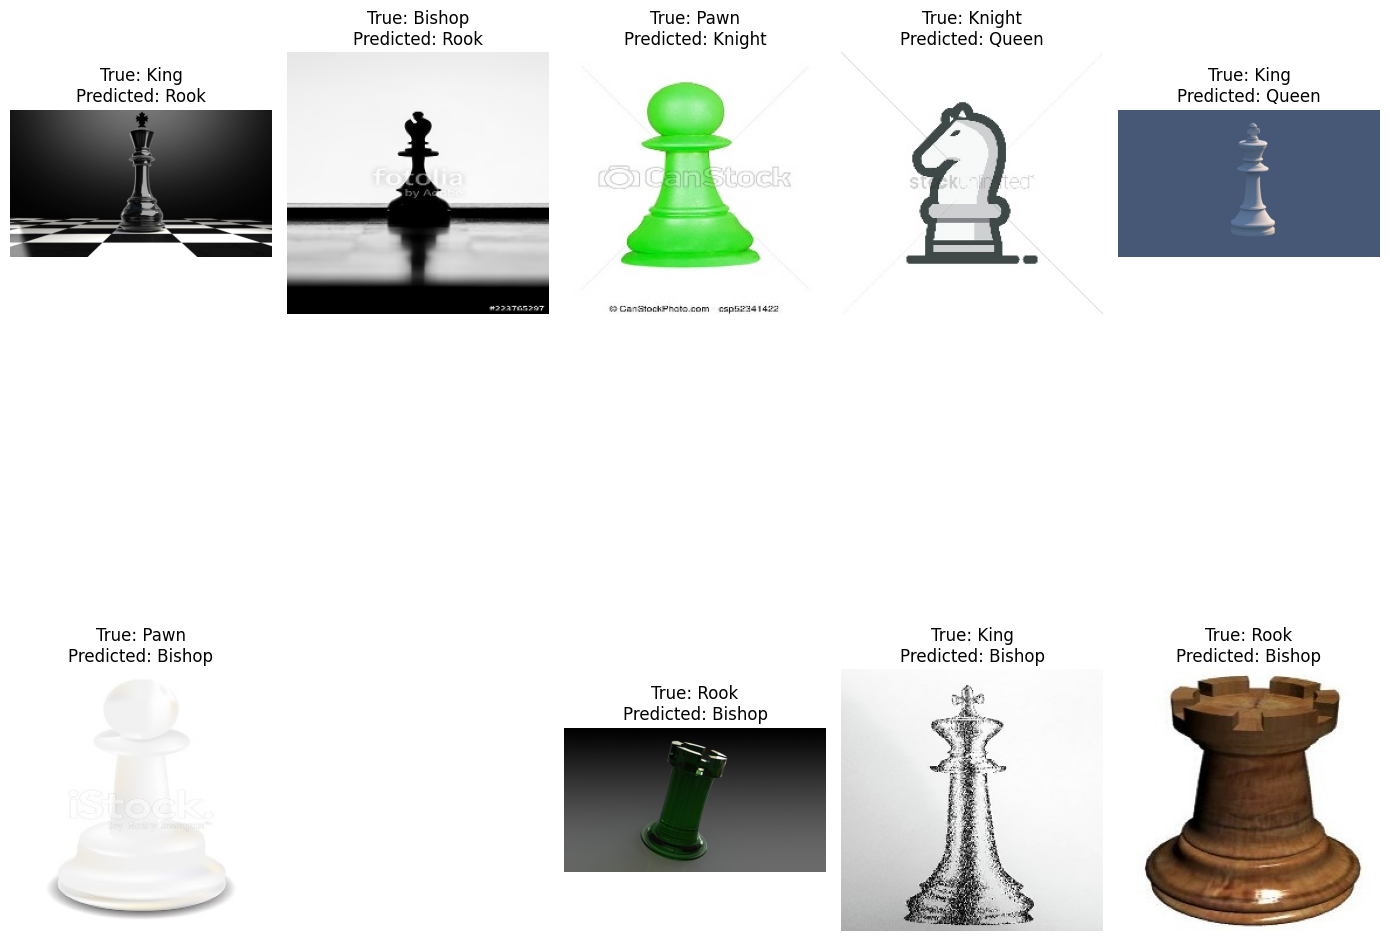

In [ ]:
# defining the incorrect prediction
incorrect_predictions = result_model_pred2[result_model_pred2['label'] != result_model_pred2['y_pred_improve']].head(10)

# plotting the incorrect prediction in the model
plt.figure(figsize=(14, 14))
for i, row in incorrect_predictions.iterrows():
    image_path = row[test_df.columns.get_loc('images')]
    true_label = row['label']
    predicted_label = row['y_pred_improve']

    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(2, 5, i % 10 + 1)
    plt.imshow(img)
    plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
    plt.axis('off')

plt.tight_layout()
plt.show()


According to the incorrect prediction some of the mistake in the dataset could be caused by the following

1. some of the incorrect prediction happen because there was a watermark which could happen because the train data doesnt have that much watermark

2. one of the incorrect prediction have two pieces which might confuse the model

3. another possible incorrect prediction could happen because the colour of the piece is too similar to the background and thus causing some confusion


# Model Saving

after evaluating the model, we can see that model using the transfer learning of vgg19 have a better accuracy from the base sequential model despite still having a low accuracy. which mean we are going to use the model with transfer learning. we can save the model using the vgg19 into .h5 format in order to do model saving

In [ ]:
# Saving model
model_tf.save("best_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Model Inference

Inference is in the file inference.ipynb

### Inference Analysis:

Both inference model succeed in predicting the class of the image which is the rook and the pawn. This is most likely because both image is clear without any watermark or same colour background.

# Analysis Model

in making the computer vision model we use 2 cnn architecture of sequential and the transfer learning of vgg19, we use the accuracy score to calculate the accuracy of the test, train, and validation data. we can see that the accuracy for the base sequential model is 16% while the improved vgg19 model is 26% meaning that the data can not accurately predict the chess pieces despite the improved model having a higher accuracy as the accuracy is still lower than 50%

After carrying out model definition, training, evaluation, and inference we can also see several advantages and disadvantages in the improvedmodel:

Improved Model advantages:

- the model have a decent train and val accuracy at around 70%

- the model use transfer learning which should increase the accuracy of the prediction

- the model can be used to predict the chess piece in chess

model disadvantages:

- despite using transfer learning the model still have a low test accuracy

- the model fail to predict picture with watermark and same colour background which result in a low test accuracy

- the amount of image data is still low

- the model seems to struggle to differentiate the pieces due to how similar some of the pieces are

- the image data is still not great as there are still watermark and two pieces in the same picture that might affect the model training

Improvements from the model:

- add more data for training

- try to filter the data more so that the picture only contain 1 piece and no watermark

- use other transfer learning method such as Xception and vgg and resnet50

With this improvement, hopefully it can be a guide to improve the computer vision model to maximize the  accuracy of the model to predict the chess pieces in a chess game

# Conclusion

After carrying out the process from problem statement to model analysis, there are several insights that we get from the EDA process to model inference

1. From EDA we can see that the amount of image for each chess piece is almost the same so the data is balanced. we can also see that the chess pieces have some unique characteristics but the pieces have mostly the same shape. the image also consist of chesspiece in many different form, position, and colour

2. from the data augmentation we do data augmentation to increase the variety in the data such as rescaling, rotating, shifting, shearing, zooming, and flipping the data to increase variety

3. From the model definition we test 2 cnn architecture model which is sequential and vgg19 where we first calculate the sequential model and try to improve it with transfer learning of vgg19

4. From the model evaluation, we can see the following model result

baseline model :

Test Loss     : 1.8435

Test Accuracy : 0.2295

Improvement Model:

Test Loss     : 0.7826

Test Accuracy : 0.7213

this means that the model using transfer learning of vgg19 improved the model as it makes the data more good fit, thus we are going to use and save the improved model

7. From inference data, we can calculate the chess pieces from an image based on the inference we did it can accurately predict the rook and pawn data provided

After creating this model we can get several business insights.

1. by using the prediction model created in this notebook, we can use this model so that the computer could recognize the chess pieces, which could be used to recognize the chess piece of a live match from the footage captured on camera and turn it into a digital game for the online viewer as the problem statement state.


2. the model can predict the chess pieces by 26% accuracy meaning that the model could still be improved in order to more accurately predict a chess piece by cleaning up the data. but overall it could do its job in predicting a chess piece from a picture